In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
dataset = pd.merge(city_data, ride_data, how='outer', on='city')
dataset = dataset.dropna(how='any')
dataset = dataset.sort_values('city')
dataset_alpha = dataset.set_index('city')

#Group by city
by_city = dataset.groupby(['city'])

# Display the data table for previous
by_city.head(3)

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
241,Barajasview,26,Urban,2018-04-09 08:10:39,39.36,1801612492097
234,Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481
235,Barajasview,26,Urban,2018-01-23 13:23:53,37.68,4108452999906
2050,Barronchester,11,Suburban,2018-04-28 11:49:26,39.19,9917743781176
2047,Barronchester,11,Suburban,2018-03-20 18:52:21,35.09,4842145178376
2048,Barronchester,11,Suburban,2018-01-09 09:01:36,38.57,1246866692006
2010,Bethanyland,22,Suburban,2018-03-14 09:47:00,44.31,578529678609


## Bubble Plot of Ride Sharing Data

In [14]:
# Create columns representing data we need
# Combine into a df with all the data

fare_mean=by_city['fare'].mean()
ride_count=by_city['ride_id'].count()
driver_count=by_city['driver_count'].mean()
city_types=by_city['type'].unique()

car_df=pd.DataFrame({'fare_mean':fare_mean,'ride_count':ride_count,'driver_count':driver_count, 'city_types':city_types})
car_df.head()

,fare_mean,ride_count,driver_count,city_types
city,,,,
Amandaburgh,24.641667,18,12,[Urban]
Barajasview,25.332273,22,26,[Urban]
Barronchester,36.422500,16,11,[Suburban]
Bethanyland,32.956111,18,22,[Suburban]
Bradshawfurt,40.064000,10,7,[Rural]


In [3]:
# After I got everything working, I went back to take out
# hard lables

labels = dataset['type'].unique().tolist()
labels

['Urban', 'Suburban', 'Rural']

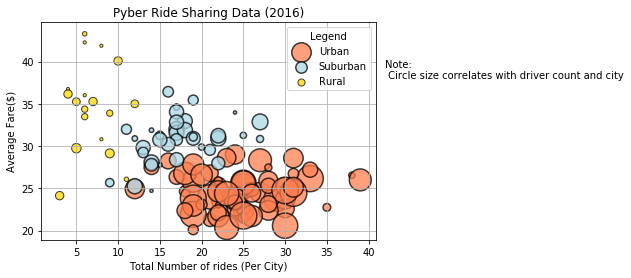

In [4]:
#Create a separate df for urban, suburban, rural
urban=car_df.loc[car_df['city_types']== labels[0]]

Suburban=car_df.loc[car_df['city_types']== labels[1]]

Rural=car_df.loc[car_df['city_types']== labels[2]]

# Build a separate scatter plot for each 'type': Urban, Suburban, Rurual
plt.scatter(urban["ride_count"], urban["fare_mean"], color = "coral", edgecolors="black", 
            s = urban["driver_count"]*10, alpha = 0.75, linewidth = 1.5)

plt.scatter(Suburban["ride_count"], Suburban["fare_mean"], color = "lightblue", edgecolors="black", 
            s = Suburban["driver_count"]*10, alpha = 0.75, linewidth = 1.5)

plt.scatter(Rural["ride_count"], Rural["fare_mean"], color = "gold", edgecolors="black", 
            s = Rural["driver_count"]*10, alpha = 0.75, linewidth = 1.0)

# Incorporate the other graph properties
plt.xlabel("Total Number of rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.text(42,38, "Note:\n Circle size correlates with driver count and city")
plt.legend(labels = labels, title = "Legend", loc='upper right')

# Create a legend

# Incorporate a text label regarding circle sizepl
plt.grid()

# Save Figure
plt.savefig("images/pyber_ride_sharing_data2.png")

In [5]:
# Show plot
plt.show()


## Total Fares by City Type

In [6]:
#restate car_df into type_fares_df to include sum of fares
fare_total=by_city['fare'].sum()

type_fares_df=pd.DataFrame({'fare_total':fare_total,'ride_count':ride_count,'driver_count':driver_count, 'city_types':city_types})

# Calculate Type Percents
urban_fares=type_fares_df['fare_total'].loc[type_fares_df['city_types']=='Urban'].sum()
suburban_fares=type_fares_df['fare_total'].loc[type_fares_df['city_types']=='Suburban'].sum()
rural_fares=type_fares_df['fare_total'].loc[type_fares_df['city_types']=='Rural'].sum()

fares_total = urban_fares + suburban_fares + rural_fares

fares_pie = [urban_fares/fares_total, suburban_fares/fares_total, rural_fares/fares_total]
fares_pie

[0.6272463496228436, 0.30463872062732217, 0.06811492974983412]

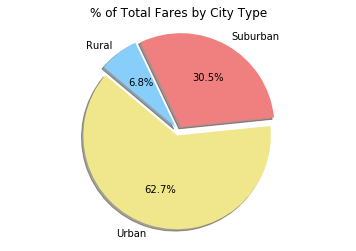

In [7]:
# Build Pie Chart

# The colors of each section of the pie chart
colors = ["khaki", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate section from the others
explode = (.05, .05, .05)

plt.pie(fares_pie, labels=labels, colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

plt.axis('equal')
# Save Figure
plt.savefig("images/fares_by_city_type2.png")

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

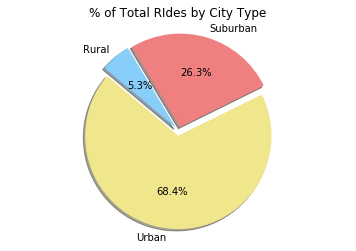

In [9]:
# Calculate Ride Percents
# We can use car_df to get total rides, already done
# Change fare calculations from above to ride_count calculations
urban_rides = car_df['ride_count'].loc[car_df['city_types']=='Urban'].sum()
suburban_rides = car_df['ride_count'].loc[car_df['city_types']=='Suburban'].sum()
rural_rides = car_df['ride_count'].loc[car_df['city_types']=='Rural'].sum()

rides_total = urban_rides + suburban_rides + rural_rides

rides_pie = [urban_rides/rides_total, suburban_rides/rides_total, rural_rides/rides_total]

# Build Pie Chart

# The colors of each section of the pie chart
colors = ["khaki", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate section from the others
explode = (.05, .05, .05)

plt.pie(rides_pie, labels=labels, colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total RIdes by City Type")

plt.axis('equal')
# Save Figure
plt.savefig("images/rides_by_city_type2.png")


In [10]:
# Show Figure
plt.show()

## Total Drivers by Driver Type

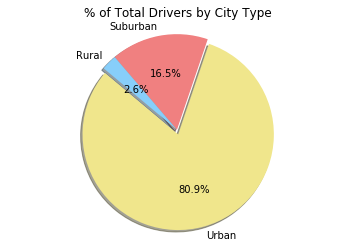

In [11]:
# Calculate Driver Percents
# Similar to rides above, we can use car_df to get total drivers, already done
# Change fare calculations from above to driver_count calculations
urban_driver = car_df['driver_count'].loc[car_df['city_types']=='Urban'].sum()
suburban_driver = car_df['driver_count'].loc[car_df['city_types']=='Suburban'].sum()
rural_driver = car_df['driver_count'].loc[car_df['city_types']=='Rural'].sum()

driver_total = urban_driver + suburban_driver + rural_driver

driver_pie = [urban_driver/driver_total, suburban_driver/driver_total, rural_driver/driver_total]
driver_pie

# Build Pie Chart

# The colors of each section of the pie chart
colors = ["khaki", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate section from the others
explode = (.05, .0, .0)

plt.pie(driver_pie, labels=labels, colors=colors,explode=explode,autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

plt.axis('equal')

# Save Figure
plt.savefig("images/drivers_by_driver_type2.png")


In [12]:
# Show Figure
plt.show()